# News Data Analysis

## Warning: Running this take crazy amount of time without a crazy good GPU!

In [182]:
import pandas as pd

df = pd.read_csv('./data/sb_data.csv')

In [21]:
df

,title,text,subject,date,fake
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,"November 30, 2017",0
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,"November 24, 2016",0
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,"November 24, 2017",0
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,"Nov 12, 2017",1
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"October 5, 2017",0
...,...,...,...,...,...
35913,Tennessee governor endorses Rubio in Republica...,WASHINGTON (Reuters) - Tennessee Governor Bill...,politicsNews,"February 25, 2016",0
35914,Republican Trump backed Iraq war in 2002 inter...,(Reuters) - Republican presidential front-runn...,politicsNews,"February 19, 2016",0
35915,Impact of firing Sessions could be troublesome...,(Reuters) - President Donald Trump could trigg...,politicsNews,"July 25, 2017",0
35916,U.S. hopes for more from Russia after Crimean ...,KIEV (Reuters) - The release of two Crimean Ta...,worldnews,"October 28, 2017",0


In [22]:
df.shape

(35918, 5)

In [23]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [ ]:
# !pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached regex-2024.11.6-cp39-cp39-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp39-cp39-win_amd64.whl (274 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RMARKET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Get rid of stopwords!

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
df.head()

,title,text,subject,date,fake
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,"November 30, 2017",0
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,"November 24, 2016",0
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,"November 24, 2017",0
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,"Nov 12, 2017",1
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"October 5, 2017",0


In [30]:
df.drop (columns='date', inplace=True)

In [32]:
df.head()

,title,text,subject,fake
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,0
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,0
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,0
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,1
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,0


In [33]:
X = df.drop(columns='fake', axis=1)
y = df['fake']

In [38]:
print (X)

print ("\n")

print (y)

                                                   title  \
0      France invites U.S. to Dec. 13 summit on boost...   
1          Trump keeps politics on his Thanksgiving menu   
2      Ireland's Fianna Fail party says will be elect...   
3      REPUBLICAN LEADER Implies He May Not Seat Roy ...   
4      U.S. Senate approves Trump pick as top Fed reg...   
...                                                  ...   
35913  Tennessee governor endorses Rubio in Republica...   
35914  Republican Trump backed Iraq war in 2002 inter...   
35915  Impact of firing Sessions could be troublesome...   
35916  U.S. hopes for more from Russia after Crimean ...   
35917   Trump Marks D-Day Anniversary By Bragging Abo...   

                                                    text       subject  
0      ACCRA (Reuters) - French President Emmanuel Ma...     worldnews  
1      WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...  politicsNews  
2      DUBLIN (Reuters) - Ireland s second-largest pa...    

In [ ]:
type(X) # oviously df

pandas.core.frame.DataFrame

In [ ]:
type(y) # oviously series

pandas.core.series.Series

---

## STEMMING

Getting rid of ing, ed from verbs in English.

In [43]:
from nltk.stem import PorterStemmer

port_stem = PorterStemmer()

In [44]:
import re

In [ ]:
# Reference: https://github.com/aman-chahar/1.6M-tweets-Sentiment-Analysis 

def stemming(content):
    # a에서 z까지만 keep하고 나머지는 제거!
    stemmed_content = re.sub('[^a-zA-Z]',' ',content).lower().split()
    # 만약에 단어가 포트스템 사전에 있으면 그 단어의 원래 뜻은 return. Example: running -> run
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
stemming ("big brown fox is running down the field") # 그냥 머리에 생각나는 문장

'big brown fox run field'

In [49]:
df.head()

,title,text,subject,fake
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,0
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,0
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,0
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,1
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,0


In [ ]:
# 당연히 엄청 오래 걸립니다: 시간복잡도 = O(n^2 or n^3) 계산이 어려워여

df['title'] = df['title'].apply(stemming)

In [58]:
df['title'].head()

0    franc invit u dec summit boost fight w african...
1                      trump keep polit thanksgiv menu
2    ireland fianna fail parti say elect deputi pm ...
3    republican leader impli may seat roy moor win ...
4    u senat approv trump pick top fed regulatori o...
Name: title, dtype: object

In [ ]:
# 한번더 미친짓 합니다

df['text'] = df['text'].apply(stemming)

# <경고> 진짜 엄청 오오오오래 걸림! 진짜 하지마요 저는 했는데 하지말라면 하지마요.

In [61]:
df['text'].head()

0    accra reuter french presid emmanuel macron fea...
1    west palm beach fla washington reuter u presid...
2    dublin reuter ireland second largest parti fia...
3    new york time confirm known sinc senat major l...
4    washington reuter u senat thursday confirm ran...
Name: text, dtype: object

In [187]:
df['content'] = df['title'] + " " + df['text'] + " " + df["subject"]

In [194]:
X = df['content'].values
y = df['fake'].values

In [184]:
print (X)

print ("\n")

print (y)

['ACCRA (Reuters) - French President Emmanuel Macron fears Islamist militants have scored military and symbolic victories in West Africa while a regional military force has struggled to get off the ground, a French presidential source said on Thursday. To help get the new G5 Sahel force operating effectively, he said, France has invited the United States to a summit with the five participating countries as well as the African Union and European Union in Paris next month.  Thousands of U.N. peacekeepers, French troops and U.S. military trainers and drone operators have failed so far to stem a growing wave of jihadist violence, leading world powers to pin their hopes on the new G5 Sahel force. The G5 Sahel initiative - grouping Burkina Faso, Chad, Mali, Mauritania and Niger - faces an immense security challenge in a largely desert and weakly governed region and already faces questions over its financing and provision of equipment.  Emmanuel Macron believes that it s not going quickly eno

In [65]:
y.shape

(35918,)

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(X)

In [67]:
print (X)

  (0, 78824)	0.024072245364432525
  (0, 14380)	0.02068745714080486
  (0, 37352)	0.051301484417348074
  (0, 59109)	0.028234610254550194
  (0, 3354)	0.04627550048851992
  (0, 62139)	0.04474745211133503
  (0, 3922)	0.02393570278276923
  (0, 24641)	0.031105862689299622
  (0, 57646)	0.0323350208723918
  (0, 9132)	0.04758746980160628
  (0, 29356)	0.03206048702242949
  (0, 13746)	0.03402773518596907
  (0, 18380)	0.046251709007740664
  (0, 58651)	0.06076229319082235
  (0, 49557)	0.03253969957658902
  (0, 24332)	0.04665196476050727
  (0, 45497)	0.04426165709944376
  (0, 45328)	0.18436024754715255
  (0, 14110)	0.04585597000661178
  (0, 49570)	0.0430971300694851
  (0, 32895)	0.04785023101453782
  (0, 4885)	0.021901055627425132
  (0, 6011)	0.04413677085251835
  (0, 33031)	0.05420129766273941
  (0, 64907)	0.046740345114029636
  :	:
  (35917, 47844)	0.020196034845206674
  (35917, 39515)	0.02489937423592864
  (35917, 78859)	0.048849689027189454
  (35917, 2338)	0.08762786720060324
  (35917, 37259)	0.0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # 콘퓨전 그리고 클라시피케이션은 구글에서 찾음
# https://www.labellerr.com/blog/fake-news-detection-using-nlp/ 출저

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_data_accuracy = accuracy_score(y_test, y_pred)

print(f"테스트 데이터 정확도: {test_data_accuracy} \n")

# matrix가 혼돈이옴, 그래서 정렬
conf_matrix = confusion_matrix(y_test, y_pred)


# 분류 보고하기, 완전 과적합임, 그냥 수치만 보고 kaggle넣으면 내가 닥 우승, 그러나 당연히 정확하지 않음
class_report = classification_report(y_test, y_pred)
print("분류 보고서:\n", class_report)

테스트 데이터 정확도: 0.9884465478841871 

분류 보고서:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3367
           1       0.99      0.99      0.99      3817

    accuracy                           0.99      7184
   macro avg       0.99      0.99      0.99      7184
weighted avg       0.99      0.99      0.99      7184



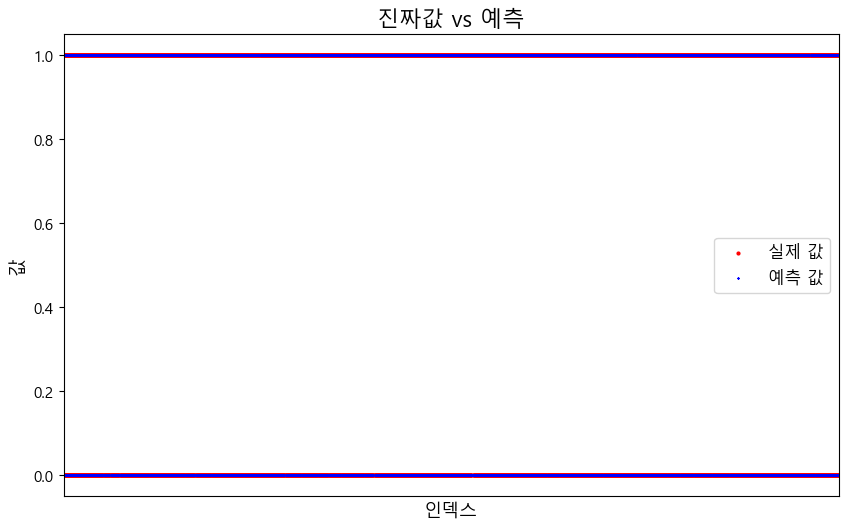

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
plt.rc('font', family='Malgun Gothic', size=12)
plt.rc('axes', titlesize=16, labelsize=13)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='red', label='실제 값', marker='o', s=4)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='예측 값', marker='x', s=1)

plt.xticks([])

plt.xlim(0, len(y_test) - 1)

plt.title('진짜값 vs 예측')
plt.xlabel('인덱스')
plt.ylabel('값')

plt.legend()
plt.show()


as shown above the data is definitely overfitted.

너무 과적합 (힌트: 아래거는 아님)

### What if I use cross fitting

In [196]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 설정 (규제 강화)
model = LogisticRegression(C=0.1)

# 교차 검증
cv_scores = cross_val_score(model, X, y, cv=5)

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print(f"테스트 데이터 정확도: {test_data_accuracy}")

r2 = r2_score(y_test, y_pred)
print(f"결정계수(R²): {r2}")

rmse = mean_squared_error(y_test, y_pred, squared=False)  
print(f"평균 제곱근 오차 (RMSE): {rmse}")

테스트 데이터 정확도: 0.9739699331848553
결정계수(R²): 0.8954695899940857
평균 제곱근 오차 (RMSE): 0.16133836126335474


^ 확실히 나아짐, 그래프 그려도 근디 티가 안남. 암튼 나아진거임!

In [74]:
print ("불용어 1시간 제거 해도 또이또이")

불용어 1시간 제거 해도 또이또이


콘텐츠 말고 그냥 하면

In [200]:
df.head()

,title,text,subject,date,fake,content
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,"November 30, 2017",0,France invites U.S. to Dec. 13 summit on boost...
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,"November 24, 2016",0,Trump keeps politics on his Thanksgiving menu ...
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,"November 24, 2017",0,Ireland's Fianna Fail party says will be elect...
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,"Nov 12, 2017",1,REPUBLICAN LEADER Implies He May Not Seat Roy ...
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"October 5, 2017",0,U.S. Senate approves Trump pick as top Fed reg...


In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['text'].values

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

y = df['fake'].values


In [215]:
print (X)

  (0, 26406)	0.01734644778110077
  (0, 56268)	0.04289256291130458
  (0, 83952)	0.029633221743372903
  (0, 38652)	0.037136486563358904
  (0, 11734)	0.038639733694189986
  (0, 87812)	0.0374653065936719
  (0, 12451)	0.02284592083456035
  (0, 40801)	0.035343801875610356
  (0, 81512)	0.03584878237579076
  (0, 852)	0.03391124048076731
  (0, 19053)	0.039770673699930176
  (0, 46424)	0.02680917572123199
  (0, 25258)	0.028780725658871086
  (0, 32283)	0.04511167555358105
  (0, 83100)	0.06397242065098067
  (0, 52050)	0.053772749970342135
  (0, 70982)	0.027192268296776807
  (0, 12890)	0.03586993692566507
  (0, 40383)	0.04289256291130458
  (0, 66008)	0.03803577413866462
  (0, 75540)	0.055037434282016046
  (0, 65740)	0.15389993954918382
  (0, 26005)	0.052184273197090104
  (0, 70995)	0.036026789707054356
  (0, 51160)	0.04513391944254382
  :	:
  (35917, 71062)	0.011930152758950202
  (35917, 52168)	0.010818496467442458
  (35917, 98592)	0.08850403720798433
  (35917, 10096)	0.026560226293269172
  (35917, 

In [216]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 설정 (규제 강화)
model = LogisticRegression(C=0.1)

# 교차 검증
cv_scores = cross_val_score(model, X, y, cv=5)

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print(f"테스트 데이터 정확도: {test_data_accuracy}")

r2 = r2_score(y_test, y_pred)
print(f"결정계수(R²): {r2}")

rmse = mean_squared_error(y_test, y_pred, squared=False)  
print(f"평균 제곱근 오차 (RMSE): {rmse}")

테스트 데이터 정확도: 0.9688195991091314
결정계수(R²): 0.8747871024528086
평균 제곱근 오차 (RMSE): 0.176579729558261


In [ ]:
# ... 이 결과가 더 좋다, 확실히 subject,title이 붙으면 더 정확하나 보다

In [217]:
df2 = pd.read_csv('./data/sb_data.csv')

In [218]:
df2

,title,text,subject,date,fake
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,"November 30, 2017",0
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,"November 24, 2016",0
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,"November 24, 2017",0
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,"Nov 12, 2017",1
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"October 5, 2017",0
...,...,...,...,...,...
35913,Tennessee governor endorses Rubio in Republica...,WASHINGTON (Reuters) - Tennessee Governor Bill...,politicsNews,"February 25, 2016",0
35914,Republican Trump backed Iraq war in 2002 inter...,(Reuters) - Republican presidential front-runn...,politicsNews,"February 19, 2016",0
35915,Impact of firing Sessions could be troublesome...,(Reuters) - President Donald Trump could trigg...,politicsNews,"July 25, 2017",0
35916,U.S. hopes for more from Russia after Crimean ...,KIEV (Reuters) - The release of two Crimean Ta...,worldnews,"October 28, 2017",0


In [277]:
fake_count = df[df['fake'] == 1].groupby('subject').size()

In [278]:
fake_count

subject
Government News    1261
Middle-east         632
News               7301
US_News             620
left-news          3569
politics           5402
dtype: int64

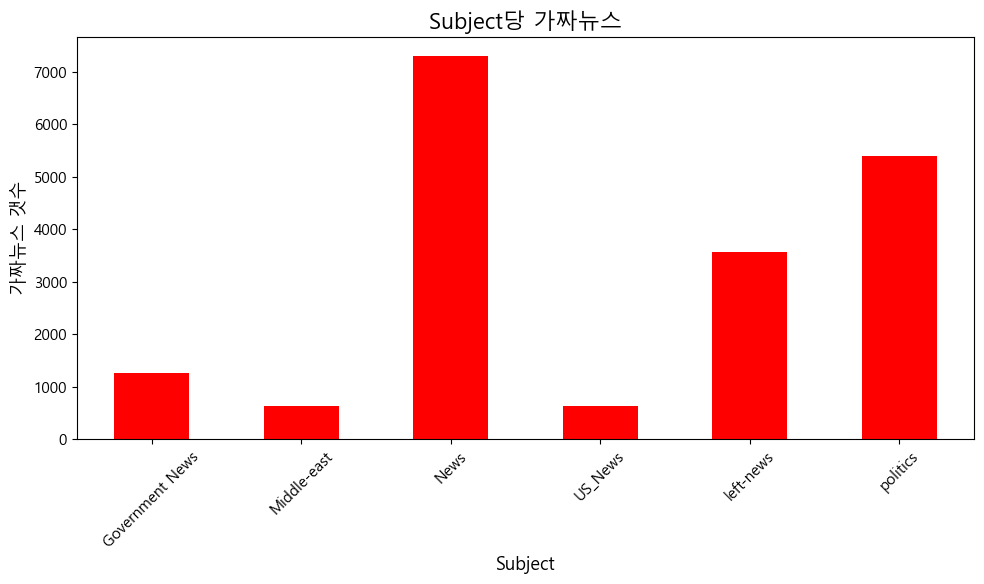

In [246]:
fake_count.plot(kind='bar', figsize=(10, 6), color='red')

plt.title('Subject당 가짜뉴스')
plt.xlabel('Subject')
plt.ylabel('가짜뉴스 갯수')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

일반 뉴스에 그냥 당연히 많고 (양이 제일 많으니)

정치, 그리고 좌파쪽 뉴스 (이것도 뭐 정치) 가 다음으로 많다

In [286]:
print (3569 + 5402)

8971


In [288]:
fake_count['total_politic'] = 8971

In [290]:
fake_count

subject
Government News    1261
Middle-east         632
News               7301
US_News             620
left-news          3569
politics           5402
total_politic      8971
dtype: int64

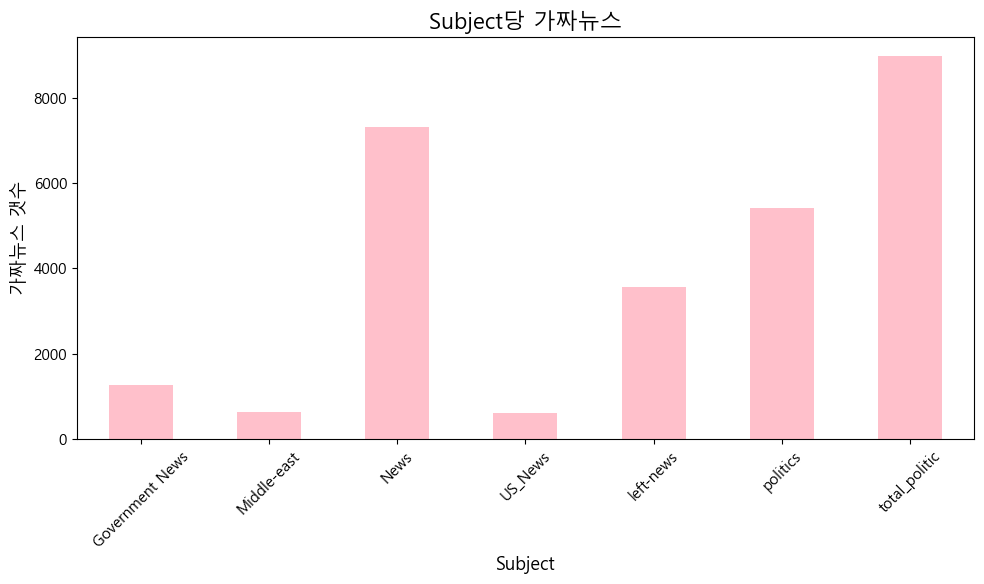

In [292]:
fake_count.plot(kind='bar', figsize=(10, 6), color='pink')

plt.title('Subject당 가짜뉴스')
plt.xlabel('Subject')
plt.ylabel('가짜뉴스 갯수')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---

머신러닝 하면 결과는? 일단 요고는 망한거

In [ ]:
X = df['text'].values
y = df['fake'].values

In [133]:
df.drop(columns='content', inplace= True)

In [134]:
df

,title,text,subject,fake
0,franc invit u dec summit boost fight w african...,accra reuter french presid emmanuel macron fea...,worldnews,0
1,trump keep polit thanksgiv menu,west palm beach fla washington reuter u presid...,politicsNews,0
2,ireland fianna fail parti say elect deputi pm ...,dublin reuter ireland second largest parti fia...,worldnews,0
3,republican leader impli may seat roy moor win ...,new york time confirm known sinc senat major l...,politics,1
4,u senat approv trump pick top fed regulatori o...,washington reuter u senat thursday confirm ran...,politicsNews,0
...,...,...,...,...
35913,tenness governor endor rubio republican presid...,washington reuter tennesse governor bill hasla...,politicsNews,0
35914,republican trump back iraq war interview say v...,reuter republican presidenti front runner dona...,politicsNews,0
35915,impact fire session could troublesom trump,reuter presid donald trump could trigger polit...,politicsNews,0
35916,u hope russia crimean prison freed,kiev reuter releas two crimean tatar russian c...,worldnews,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# https://www.quora.com/What-are-the-ways-to-reduce-the-run-time-to-train-a-model-in-deep-learning

# https://stackoverflow.com/questions/72326025/cannot-import-name-pad-sequences-from-keras-preprocessing-sequence

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 10000
# 중심극한정리에 따라서 이정도로 추론해도 결과는 비슷하다

max_sequence_length = 150 

# 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# 시퀀스화
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 페딩 추가
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
# 모두가 사랑하지는 않는 딥러닝 코드

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))

model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 150, 128)          1280000   
                                                                 
 lstm_32 (LSTM)              (None, 64)                49408     
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,333,633
Trainable params: 1,333,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 데이터가 커서 batch_size가 커도 큰 지장은 없다
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=300,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
96/96 [==============================] - 105s 1s/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0758 - val_accuracy: 0.9841
Epoch 2/5
96/96 [==============================] - 116s 1s/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0782 - val_accuracy: 0.9837
Epoch 3/5
96/96 [==============================] - 115s 1s/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0793 - val_accuracy: 0.9844
Epoch 4/5
96/96 [==============================] - 104s 1s/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0854 - val_accuracy: 0.9839
Epoch 5/5
96/96 [==============================] - 118s 1s/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0828 - val_accuracy: 0.9841


In [ ]:
# 정확도 -> 과적합없이 진짜 찐찐찐찐 찐이야

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

225/225 [==============================] - 6s 26ms/step - loss: 0.0828 - accuracy: 0.9841
Test Loss: 0.08278407901525497
Test Accuracy: 0.984131395816803


In [ ]:
predictions = model.predict(X_test_pad)

----

여기는 성공한거!

In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 10000
max_sequence_length = 150 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

y_train = np.array(y_train)
y_test = np.array(y_test)


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))

# https://velog.io/@kanghoon12/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D-%EA%B3%A0%EA%B8%89-%EC%82%AC%EC%9A%A9 출저

# recurrent_dropout -> 인풋의 영향 받는 parameter만 dropout 적용
# https://wdprogrammer.tistory.com/33 -> model에다가 l2 추가해서 overfitting 방지
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.3, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 

model.add(Dense(1, activation='sigmoid'))  

optimizer = Adam(learning_rate=0.0005)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_pad, y_train, epochs=3, batch_size=100, validation_data=(X_test_pad, y_test), callbacks=[early_stopping], verbose=1)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 150, 128)          1280000   
                                                                 
 lstm_33 (LSTM)              (None, 64)                49408     
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,333,633
Trainable params: 1,333,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
288/288 [========================

In [148]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

225/225 [==============================] - 5s 21ms/step - loss: 0.1338 - accuracy: 0.9754
Test Loss: 0.13378867506980896
Test Accuracy: 0.9753619432449341


In [173]:
predictions = model.predict(X_test_pad)

225/225 [==============================] - 4s 19ms/step


In [174]:
predictions

array([[0.00977496],
       [0.9986695 ],
       [0.0053725 ],
       ...,
       [0.00784334],
       [0.94941556],
       [0.9982272 ]], dtype=float32)

In [175]:
len (predictions)

7184

In [ ]:
# rounded = []

# for i in range(len(predictions)):
#     rounded.append(np.round(predictions[i]))

In [ ]:
# rounded

[array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], d

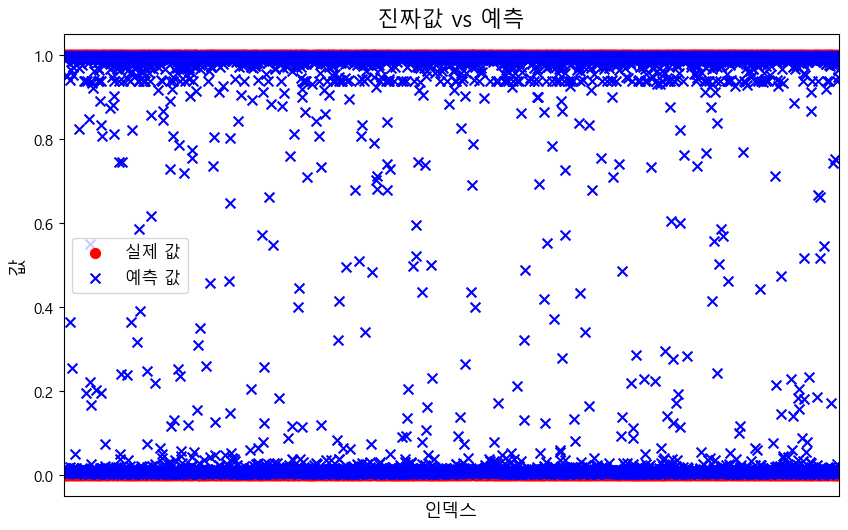

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
plt.rc('font', family='Malgun Gothic', size=12)
plt.rc('axes', titlesize=16, labelsize=13)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='red', label='실제 값', marker='o', s=50)
plt.scatter(range(len(predictions)), predictions, color='blue', label='예측 값', marker='x', s=50)

plt.xticks([])

plt.xlim(0, len(y_test) - 1)

plt.title('진짜값 vs 예측')
plt.xlabel('인덱스')
plt.ylabel('값')

plt.legend()
plt.show()

# 0.5를 기준으로 1/0에 가까우면 가짜 or 진짜, 0.5면 애메한거이다


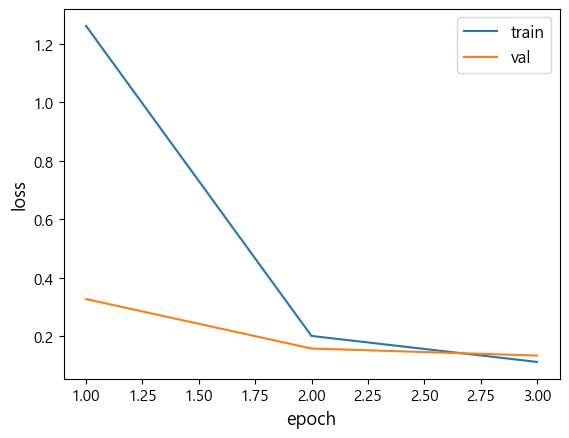

In [282]:
epochs = range(1,len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

아름다운 그래프 짜잔 :) 확실히 과적합이 아니다!

---

Other Sources

https://soohwan-justin.tistory.com/65

https://wikidocs.net/83544

https://stackoverflow.com/questions/61656444/warning-warningtensorflowmodel-was-constructed-with-shape-none-150-but-i

https://www.quora.com/What-are-the-ways-to-reduce-the-run-time-to-train-a-model-in-deep-learning

---

Validation

In [298]:
val_df = pd.read_csv ("./data/sb_validation.csv")

In [299]:
val_df.head()

,title,text,subject,date,fake
0,Dem AGs Respond To Trump Rolling Back Clean W...,Amateur president Donald Trump s hostility tow...,News,"March 1, 2017",1
1,Trump to nominate Goldman Sachs' Donovan as de...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"March 15, 2017",0
2,Iraqi forces to regain Kurdish oilfields to re...,BAGHDAD (Reuters) - Iraq will deploy troops to...,worldnews,"October 16, 2017",0
3,Britain agrees to set EU 'Exit Day' in law,LONDON (Reuters) - Britain s government said o...,worldnews,"November 9, 2017",0
4,Republican National Committee: Better A Pedop...,"By now, the whole world knows that Alabama Sen...",News,"December 5, 2017",1


In [304]:
X = val_df['text'].values
y = val_df['fake'].values

In [301]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 10000
max_sequence_length = 150 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

y_train = np.array(y_train)
y_test = np.array(y_test)


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))

model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.3, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5)) 

model.add(Dense(1, activation='sigmoid'))  

optimizer = Adam(learning_rate=0.0005)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_pad, y_train, epochs=3, batch_size=100, validation_data=(X_test_pad, y_test), callbacks=[early_stopping], verbose=1)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 150, 128)          1280000   
                                                                 
 lstm_34 (LSTM)              (None, 64)                49408     
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,333,633
Trainable params: 1,333,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
72/72 [==========================

In [303]:
accuracy = model.evaluate (X_train_pad, y_train)[1]
print (f"정확도 {accuracy:4f}")

225/225 [==============================] - 4s 18ms/step - loss: 0.4336 - accuracy: 0.9926
정확도 0.992622


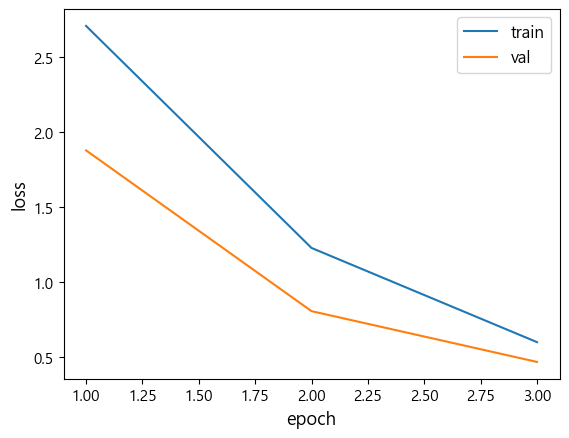

In [302]:
epochs = range(1,len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---

EPOCH 

In [305]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# https://www.quora.com/What-are-the-ways-to-reduce-the-run-time-to-train-a-model-in-deep-learning

# https://stackoverflow.com/questions/72326025/cannot-import-name-pad-sequences-from-keras-preprocessing-sequence

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 10000
# 중심극한정리에 따라서 이정도로 추론해도 결과는 비슷하다

max_sequence_length = 150 

# 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# 시퀀스화
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 페딩 추가
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

y_train = np.array(y_train)
y_test = np.array(y_test)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 데이터가 커서 batch_size가 커도 큰 지장은 없다
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=300,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
24/24 [==============================] - 19s 783ms/step - loss: 0.4114 - accuracy: 0.9897 - val_loss: 0.4050 - val_accuracy: 0.9733
Epoch 2/5
24/24 [==============================] - 21s 899ms/step - loss: 0.3418 - accuracy: 0.9921 - val_loss: 0.3529 - val_accuracy: 0.9733
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.2918 - accuracy: 0.9947 - val_loss: 0.3087 - val_accuracy: 0.9766
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.2494 - accuracy: 0.9954 - val_loss: 0.2867 - val_accuracy: 0.9705
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.2170 - accuracy: 0.9961 - val_loss: 0.2727 - val_accuracy: 0.9666


In [306]:
accuracy = model.evaluate (X_train_pad, y_train)[1]
print (f"정확도 {accuracy:4f}")

225/225 [==============================] - 6s 26ms/step - loss: 0.1914 - accuracy: 0.9971
정확도 0.997077


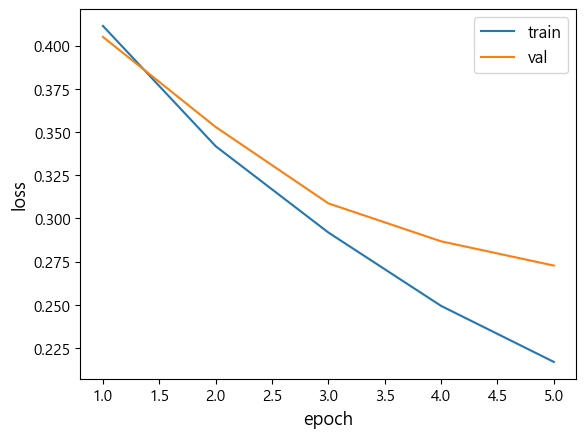

In [307]:
epochs = range(1,len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()